<a href="https://colab.research.google.com/github/ASchurNU/test_colab_integration/blob/main/wine_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build & Evaluate Unsupervised Learning Models

## Import libraries, load data & inspect data

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Load dataset
file_path = 'C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Data/Wine Dataset for Clustering/wine-clustering.csv'
wine_data = pd.read_csv(file_path)

In [ ]:
# Inspecting the data
print("First 5 rows of the dataset:")
print(wine_data.head())

First 5 rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2  

In [ ]:
print("Dataset Information:")
wine_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Standardize & Scale the Data

As we can see from the above data inspection the dataset contains 178 observations with 13 features. Some of the features in the dataset are on a larger scale than the others. To ensure these variable do not carry more weight than the others I will standardize all variables. Scikit-learn provides a convient function "StandardScaler()" for this task.

In [ ]:
# Standardize
scaler = StandardScaler()
scaled_wine_data = scaler.fit_transform(wine_data)

# Coverting the scaled data back into a dataframe
scaled_wine_df = pd.DataFrame(scaled_wine_data, columns = wine_data.columns)

print("First 5 rows of the standardized data:")
print(scaled_wine_df.head())

First 5 rows of the standardized data:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful statistical technique used to simplify the complexity of high-dimensional data while retaining as much of the original information as possible. At its core, PCA transforms a large set of variables into a smaller, more manageable set of new variables, called principal components, that are uncorrelated with each other. This process, known as dimensionality reduction. The goal here is to reduce the number of variables to a smaller set of principal componets that capture at least 80% of the total variance.

In [ ]:
# Performing PCA
pca = PCA()
pca.fit(scaled_wine_df)

# Calculating the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components that explain at least 80% of the variance
number_components_80 = np.where(cumulative_variance_ratio >= 0.8)[0][0] + 1

print(f"Number of components to explain 80% of variance: {number_components_80}")

Number of components to explain 80% of variance: 5


### Proportion of variance plot

The PCA variance plot below shows the cumulative variance explained by the principal componets. Just 5 principal components are needed to capture 80% of the variance in the original 13-dimensinal dataset which significantly reduces the dimensionality. This allows for the clustering analysis utilized later to be more efficient by reducing noise.

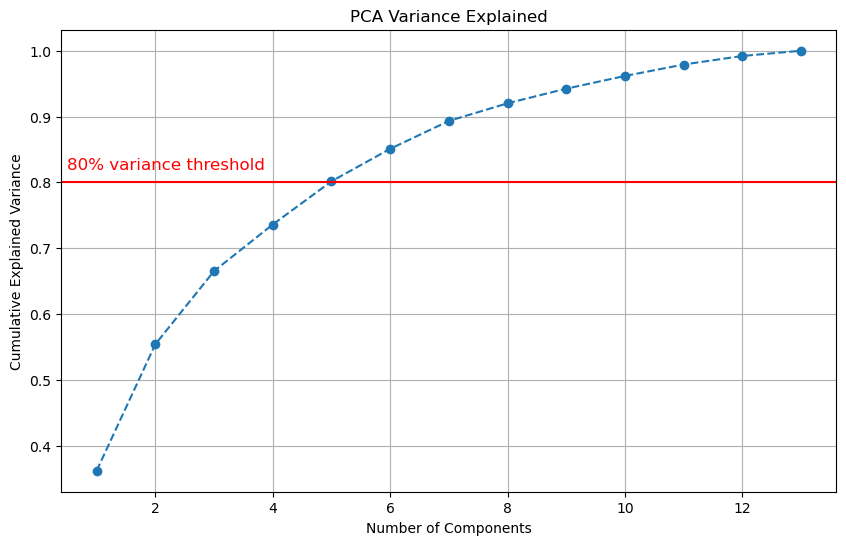

In [ ]:
# Creating the variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('PCA Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.82, '80% variance threshold', color = 'red', fontsize=12)
plt.grid(True)

Now I will perform PCA with the determined number of components.

In [ ]:
pca = PCA(n_components = number_components_80)
principal_components = pca.fit_transform(scaled_wine_df)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = [f'PC{i+1}' for i in range(number_components_80)])
print("\nFirst 5 rows of the PCA-transformed data:")
print(pca_df.head())


First 5 rows of the PCA-transformed data:
        PC1       PC2       PC3       PC4       PC5
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655
2  2.516740 -1.031151  0.982819  0.724902 -0.251033
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842
4  1.008908 -0.869831  2.026688 -0.409766  0.298458


## K-Means Clustering

Here I will partition the data into k clusters in which each data point belongs to the cluster with the nearest mean. A key challenge with K-Means is determining the optimal number of clusters, k. I will use the Elbow Method and Silhouette Score to guide this decision.

In [ ]:
# Determining the optimal number of clusters using the Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

### Plotting the Elbow Method & Silhouette Scores

**Elbow Method:** The Elbow Method is a heuristic used to determine the optimal number of clusters in a dataset. It works by plotting the within-cluster sum of squares (WCSS) against the number of clusters. WCSS is the sum of the squared distance between each data point and its assigned cluster's centroid.
- The "Elbow" of the plot is the ideal number of clusters and is located where the graph starts to bend indicating that adding another cluster does not significantly reduce the WCSS and provides deminishing returns.

**Silhouette Score:** The Silhouette Score is a metric that measures how well-separated clusters are. It quantifies how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).
- **+1:** indicates that the data point is far from the neighboring clussters and very close to its assigned cluster.
- **0:** suggests that the data point is close to the decision boundary between two clusters.
- **-1:** Implies that the data point is assigned to the wrong cluster.

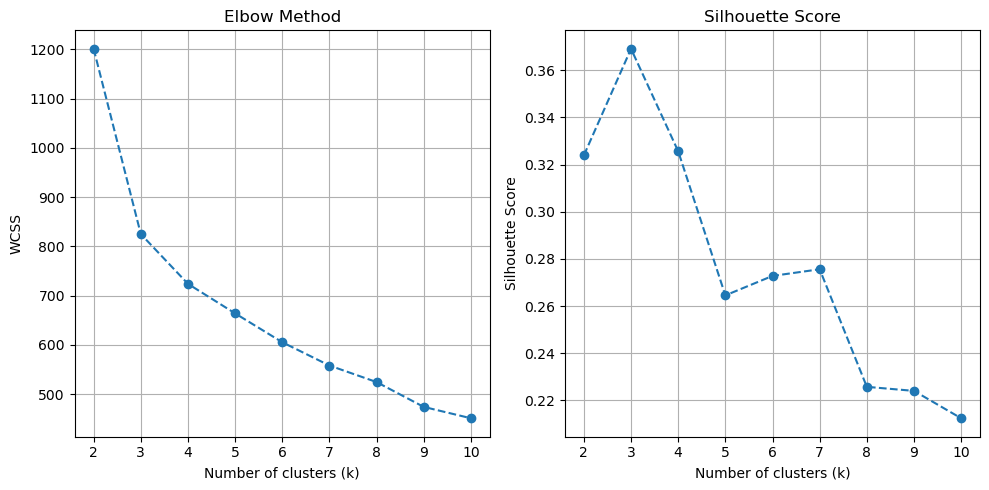

In [ ]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_evaluation.png')

Both the elbow method and the silhouetter score indicate that the optimal number of clusters is 3.

### Final Clustering k = 3

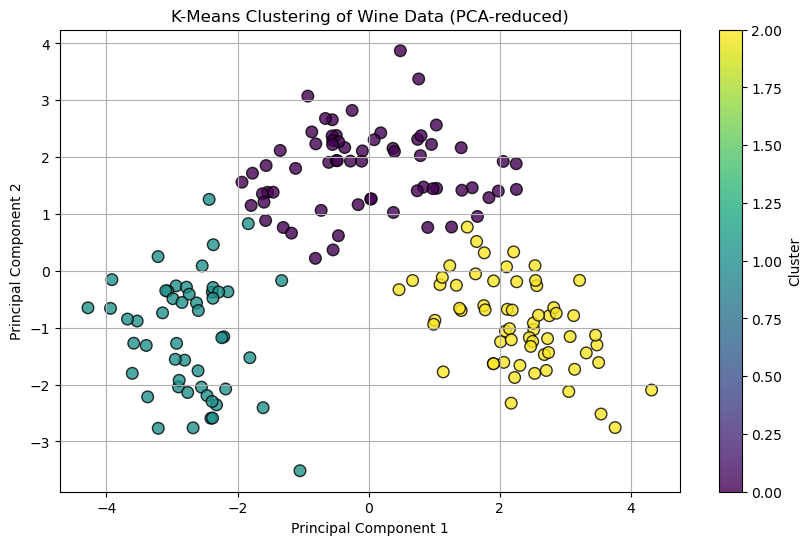

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_df)

# Add the cluster labels to the original and PCA dataframes
wine_data['KMeans_Cluster'] = kmeans_labels
pca_df['KMeans_Cluster'] = kmeans_labels

# Visualize the K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans_Cluster'], cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.8)
plt.title('K-Means Clustering of Wine Data (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

## Hierarchical Clustering

Hierarchical clustering is an alternative clustering method that builds a hierarchy of clusters. It can be either agglomerative (bottom-up) or divisive (top-down). I will use an agglomerative approach. The results are typically visualized as a dendrogram, which is a tree-like diagram that shows the arrangement of the clusters.

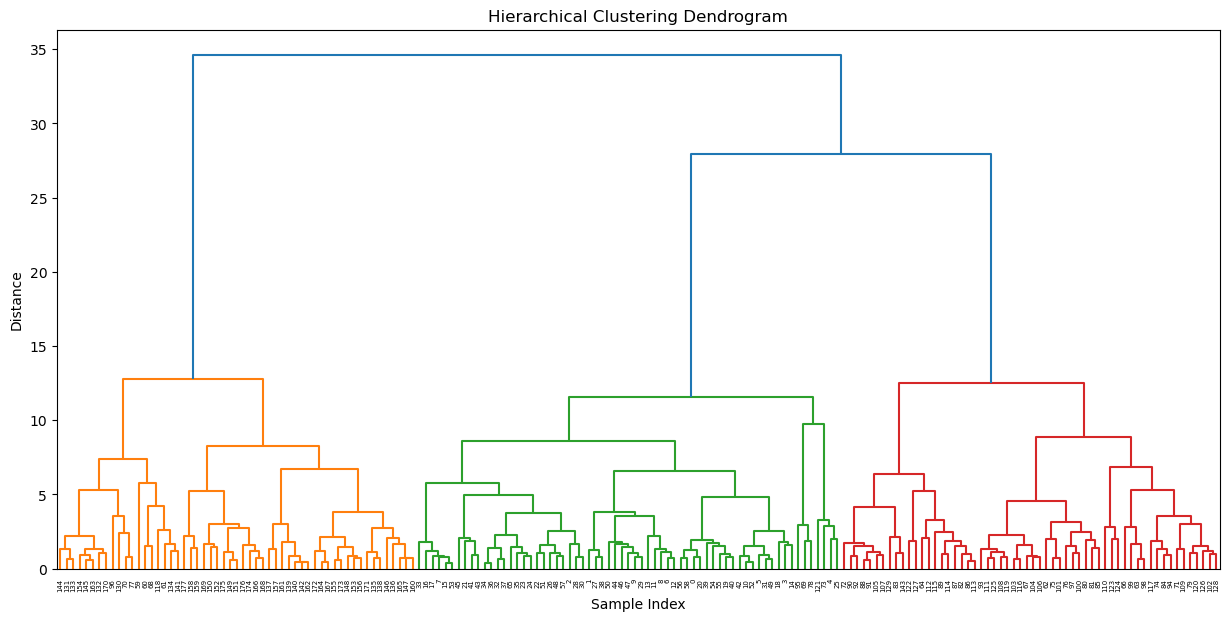

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(15, 7))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram = shc.dendrogram(shc.linkage(pca_df.drop('KMeans_Cluster', axis=1), method='ward'))

Just like k-means clustering the dendrogram shows that the optimal number of clusters in 3.

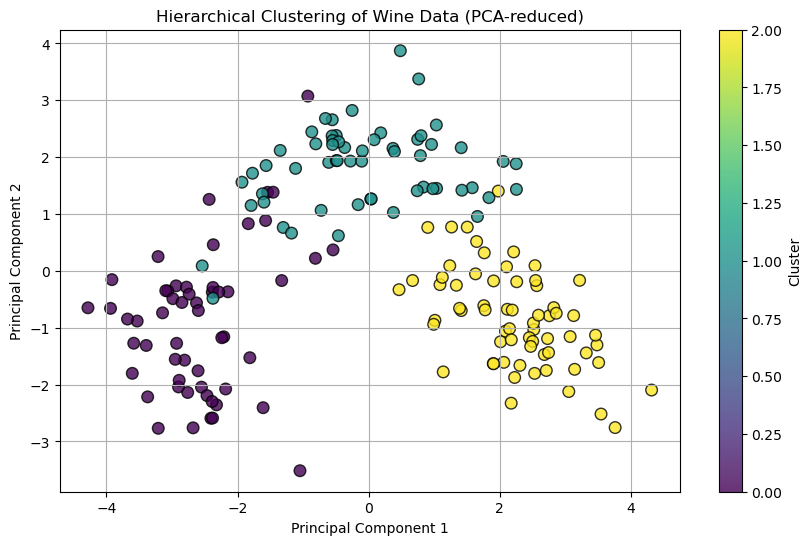

In [ ]:
# Assigning cluster labels based on 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = agg_cluster.fit_predict(pca_df.drop('KMeans_Cluster', axis=1))

# Adding the hierarchical cluster labels to the dataframes
wine_data['Hierarchical_Cluster'] = hierarchical_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels

# Visualize the Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Hierarchical_Cluster'], cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.8)
plt.title('Hierarchical Clustering of Wine Data (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Save the final clustered data to a CSV file
wine_data.to_csv('wine_fully_clustered.csv', index=False)

The scatter plot of the clusters obtained from hierarchical clustering is very similar to the one from K-Means, which gives us confidence in the 3-cluster solution. The final clustered data from both methods is available in wine_fully_clustered.csv

## Findings & Assumptions

### Findings
Both K-Means and Hierarchical clustering, when applied to the dimensionality-reduced wine dataset, strongly suggest the presence of three distinct clusters. The consistency of the results from two different clustering methods gives us confidence in this conclusion. These clusters likely represent three different types of wine or cultivars.

### Assumptions
- **PCA Assumptions:** PCA assumes a linear relationship between variables. It also works best with data that is at least approximately normally distributed.
- **K-Means Assumptions:** K-Means assumes that clusters are spherical, have similar variance, and are of a similar size. The use of PCA can sometimes help to meet these assumptions.
- **Hierarchical Clustering Assumptions:** The main assumption of hierarchical clustering is that data points that are close to each other in the feature space should be in the same cluster. The choice of linkage method (e.g., 'ward') also implies certain assumptions about the cluster structure.